In [1]:
import sys
import pandas as pd
sys.path.insert(0, "../")

from michael import janet

Hi there. Welcome to the good place.


In [2]:
uni = pd.read_csv("/Users/oliver hall/Research/unicorn/data/unicorn.csv", index_col=0)

Index 258 is a good tester. Clear rotational signal, ambiguous peak mode.

In [3]:
j = janet.boot(uni, index=258)

Already have data loaded for Gaia ID 1923544057484996224.
If you want to check for new data, run `janet.Update()`.
### Running Simple Astropy Lomb-Scargle on Sector 16 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 16 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector 17 on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector 17 on star 1923544057484996224 ###
### Saved results ###
### Running Simple Astropy Lomb-Scargle on Sector all on star 1923544057484996224 ###
### Completed Simple Astropy Lomb-Scargle for Sector all on star 1923544057484996224 ###
### Saved results ###
### Running Wavelet Estimation on star 1923544057484996224 ###


/Users/Anaconda/anaconda3/lib/python3.8/site-packages/jazzhands/wavelets.py:488: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm



### Completed Wavelet Estimation on star 1923544057484996224 ###
### Saved results ###


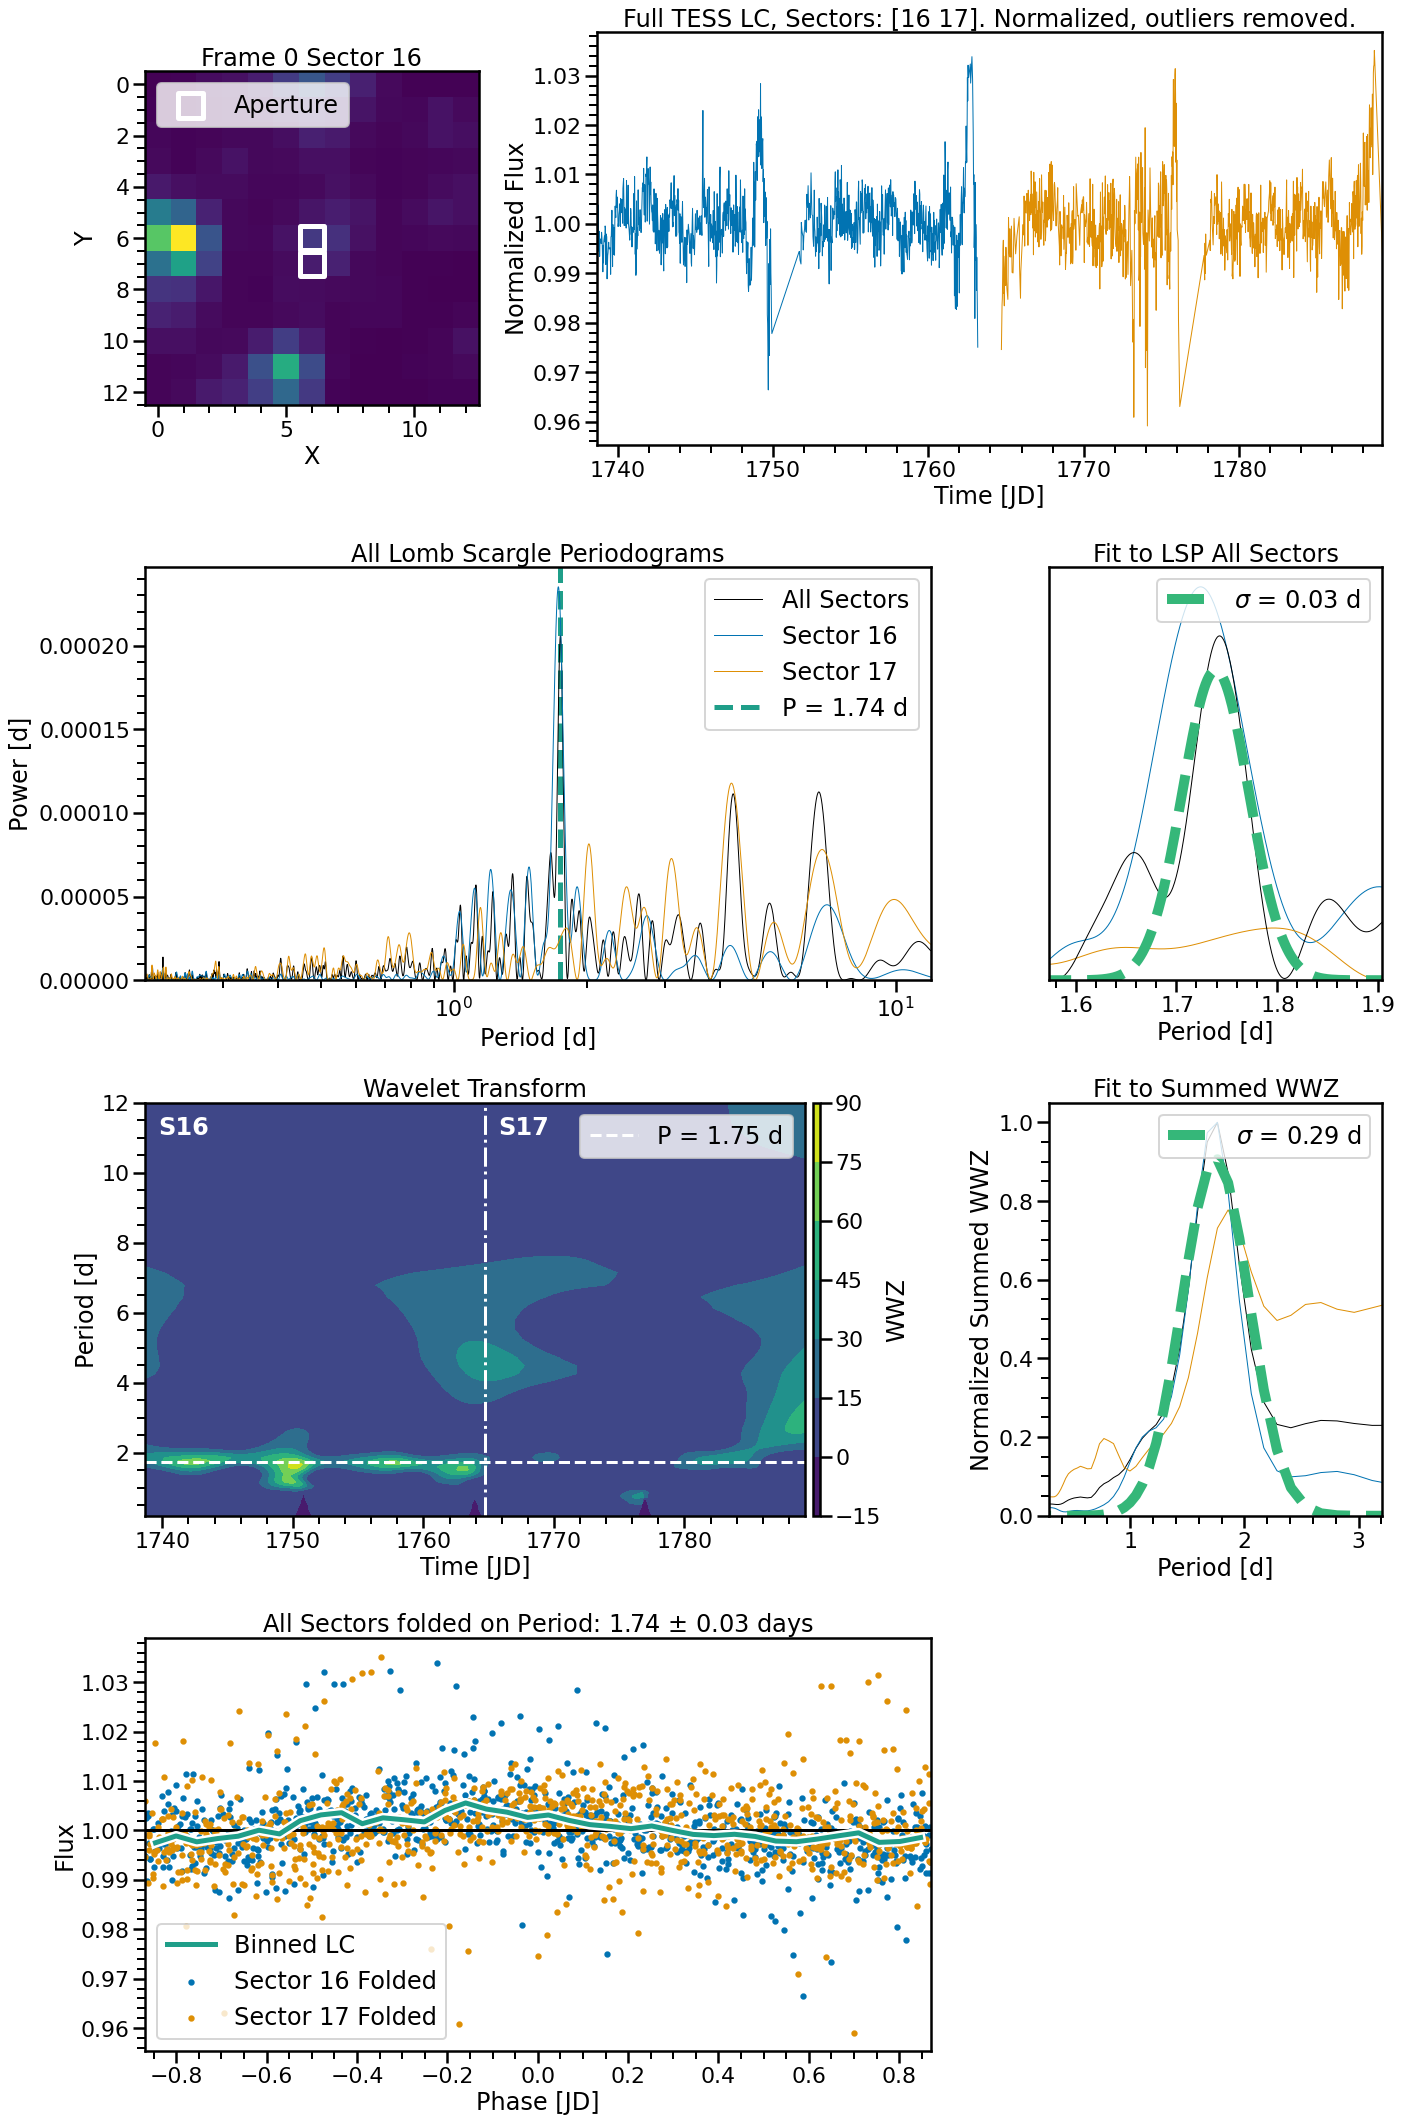

In [4]:
j.run()

In [6]:
j.results

,SLS,e_SLS,f_SLS,SW,e_SW,s_SLS,overall,e_overall,f_overall
16,1.724326,0.047084,0.0,NaN,NaN,NaN,NaN,NaN,NaN
17,4.264724,0.198192,0.0,NaN,NaN,NaN,NaN,NaN,NaN
all,1.739095,0.033149,0.0,1.748376,0.292041,NaN,NaN,NaN,NaN
best,1.739095,0.033149,0.0,1.748376,0.292041,all,1.739095,0.033149,1.0


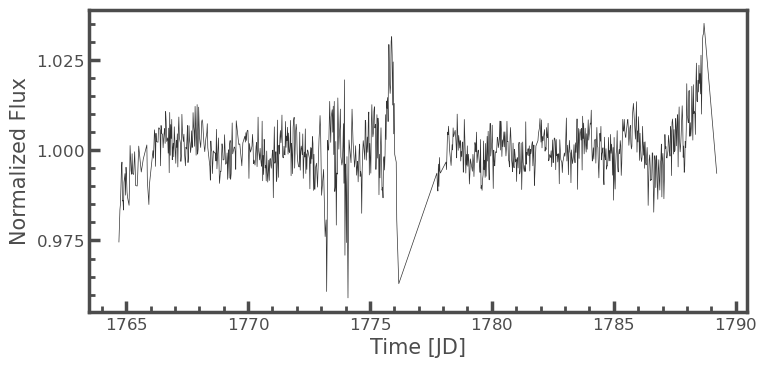

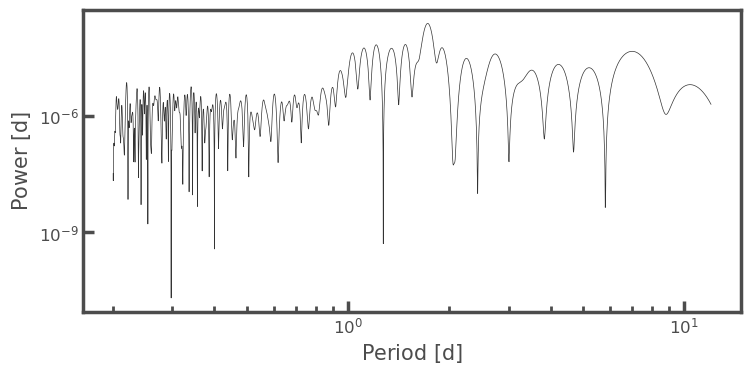

In [8]:
pg = j.void['pg_16']
ts = j.void['clc_17']
ts.plot();
pg.plot(scale='log')

$\sigma_{PS}^2 = 2/N \times \sigma_{TS}^2$

In [12]:
import numpy as np
sig_rms = np.sqrt(np.mean((ts.flux.value- 1)**2))

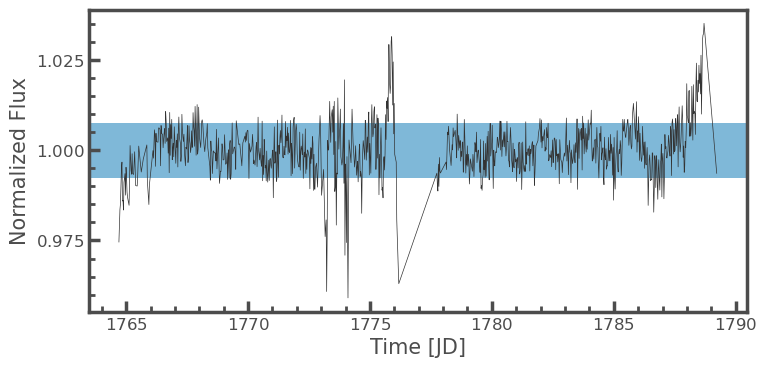

In [16]:
ax = ts.plot()
ax.axhspan(1 - sig_rms, 1 + sig_rms, alpha=.5)

In [26]:
sig_ps = 4 * sig_rms **2 / len(ts.flux.value)
sig_ps

2.513175143303643e-07

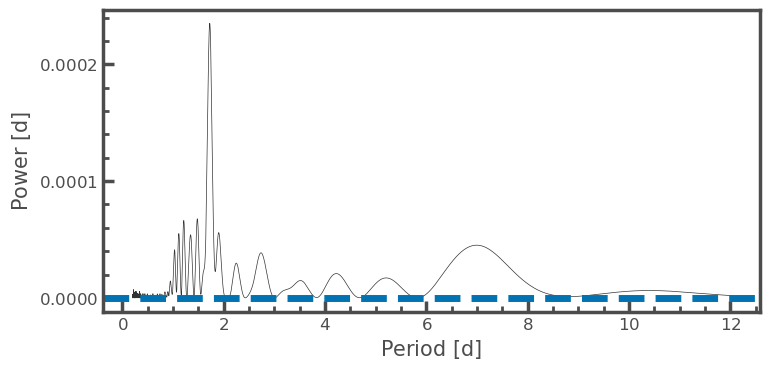

In [27]:
ax = pg.plot()
ax.axhline(sig_ps, lw=5, ls='--')

In [29]:
j.void['popt_16']

array([1.72432599e+00, 4.70837529e-02, 2.29273844e-04])

In [ ]:
H = j.void['popt_16'][2]


### Test & training runs

In [28]:
len(ts)

928

- Improve period labels
- Add comparison plot at end
- Pickle the void